In [1]:
from tomographic_lensing import *
from CovMat import *
import gc

In [2]:
# Input Cosmology object with a given set of parameters
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96, transfer_function='bbks')

elll = np.arange(2, 10001)

In [3]:
dndz1=GalaxyDistr(zi=0.0, zf=4.0, n_eff=10.024, z0=0.13, alpha=0.78)
#n_eff is chosen from the last column of Table F1,"https://arxiv.org/abs/1809.01669" LSST Science Requirements Document
#z0 and alpha are from Figure F4, Y1 of the same document

In [4]:
arcmin_per_str=(180*60/np.pi)**2
#how many square arcminutes are there in a steradian 
num_den_per_str = arcmin_per_str*10/0.28**2

In [5]:
#dividing the galaxy distribution into 8 redshift bins
#Z stands for dividing into bins of equal redshifts
#N stands for dividing into bins of equal number of galaxies

redshifts = {} #initializing redshift dictionary 
cl = {} 
cov = {}


for rbin_type in ["z", "n"]:
    cov["{}_5".format(rbin_type)], cl["{}_5".format(rbin_type)], redshifts["{}_5".format(rbin_type)] = getDataArray(rbins = 5, rbin_type = rbin_type, cosmo = cosmo, dndz = dndz1, ell = elll, fsky = 0.4, num_den_per_str = num_den_per_str)

In [6]:
redshifts["n_5"]

[0.0,
 0.3508771929824561,
 0.5513784461152882,
 0.7719298245614035,
 1.112781954887218,
 3.989974937343358]

In [8]:
#find derivatives of data array
#try with 5 bins, and "known" galaxy redshift distribution first
#consider only equal galaxy number bins for now

def getC_ellOfSigma8(sigma8):
    """create derivatives of cl w.r.t to Sigma8"""
    cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=sigma8, n_s=0.96, transfer_function='bbks')
    lens, redshifts = CreatelensN(n_bins = 5, dndz = dndz1, cosmo = cosmo)
    Cl = getLensingCRmatrix(lenses = lens, ell = elll, cosmo = cosmo)
    cl = []
    for j in range(5):
        cl.extend(Cl[j, j+i] for i in range(5-j))
    cl_arr = np.array(cl)
    return cl_arr

def getC_ellOfOmegab(Omega_b):
    cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=Omega_b, h=0.67, sigma8=0.8, n_s=0.96, transfer_function='bbks')
    lens, redshifts = CreatelensN(n_bins = 5, dndz = dndz1, cosmo = cosmo)
    Cl = getLensingCRmatrix(lenses = lens, ell = elll, cosmo = cosmo)
    cl = []
    for j in range(5):
        cl.extend(Cl[j, j+i] for i in range(5-j))
    cl_arr = np.array(cl)
    return cl_arr

def getC_ellOfh(h):
    cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=h, sigma8=0.8, n_s=0.96, transfer_function='bbks')
    lens, redshifts = CreatelensN(n_bins = 5, dndz = dndz1, cosmo = cosmo)
    Cl = getLensingCRmatrix(lenses = lens, ell = elll, cosmo = cosmo)
    cl = []
    for j in range(5):
        cl.extend(Cl[j, j+i] for i in range(5-j))
    cl_arr = np.array(cl)
    return cl_arr

def getC_ellOfn_s(n_s):
    cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=n_s, transfer_function='bbks')
    lens, redshifts = CreatelensN(n_bins = 5, dndz = dndz1, cosmo = cosmo)
    Cl = getLensingCRmatrix(lenses = lens, ell = elll, cosmo = cosmo)
    cl = []
    for j in range(5):
        cl.extend(Cl[j, j+i] for i in range(5-j))
    cl_arr = np.array(cl)
    return cl_arr

def getC_ellOfOmegam(Omega_m):
    cosmo = ccl.Cosmology(Omega_c= Omega_m-0.045, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96, transfer_function='bbks')
    lens, redshifts = CreatelensN(n_bins = 5, dndz = dndz1, cosmo = cosmo)
    Cl = getLensingCRmatrix(lenses = lens, ell = elll, cosmo = cosmo)
    cl = []
    for j in range(5):
        cl.extend(Cl[j, j+i] for i in range(5-j))
    cl_arr = np.array(cl)
    return cl_arr

def getC_ellOfw0(w_0):
    cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96, w0=w_0, transfer_function='bbks')
    lens, redshifts = CreatelensN(n_bins = 5, dndz = dndz1, cosmo = cosmo)
    Cl = getLensingCRmatrix(lenses = lens, ell = elll, cosmo = cosmo)
    cl = []
    for j in range(5):
        cl.extend(Cl[j, j+i] for i in range(5-j))
    cl_arr = np.array(cl)
    return cl_arr

def getC_ellOfwa(w_a):
    cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.8, n_s=0.96,wa=w_a, transfer_function='bbks') 
    lens, redshifts = CreatelensN(n_bins = 5, dndz = dndz1, cosmo = cosmo)
    Cl = getLensingCRmatrix(lenses = lens, ell = elll, cosmo = cosmo)
    cl = []
    for j in range(5):
        cl.extend(Cl[j, j+i] for i in range(5-j))
    cl_arr = np.array(cl)
    return cl_arr


In [9]:
funcs = {
    'sigma_8': getC_ellOfSigma8,
    'omega_b': getC_ellOfOmegab,
    'h': getC_ellOfh,
    'n_s': getC_ellOfn_s,
    'omega_m': getC_ellOfOmegam,
    'w_0': getC_ellOfw0,
    'w_a': getC_ellOfwa
}
vals = {
    'sigma_8': 0.8, 
    'omega_b': 0.045, 
    'h': 0.67, 
    'n_s': 0.96, 
    'omega_m': 0.315,
    'w_0': -1,
    'w_a': 0
}

In [10]:
import numdifftools as nd

In [11]:
help(nd.Derivative)

Help on class Derivative in module numdifftools.core:

class Derivative(numdifftools.limits._Limit)
 |  Derivative(fun, step=None, method='central', order=2, n=1, full_output=False, **step_options)
 |  
 |  Calculate n-th derivative with finite difference approximation
 |  
 |  Parameters
 |  ----------
 |  fun : function
 |     function of one array fun(x, `*args`, `**kwds`)
 |  step : float, array-like or StepGenerator object, optional
 |      Defines the spacing used in the approximation.
 |      Default is MinStepGenerator(base_step=step, step_ratio=None,
 |                                 num_extrap=0, **step_options)
 |      if step or method in in ['complex', 'multicomplex'],
 |      otherwise
 |          MaxStepGenerator(step_ratio=None, num_extrap=14, **step_options)
 |      The results are extrapolated if the StepGenerator generate more than 3
 |      steps.
 |  method : {'central', 'complex', 'multicomplex', 'forward', 'backward'}
 |      defines the method used in the appro

In [12]:
derivs_sig = {}
for var in funcs.keys():
    print(var)
    if var == 'w_a':
        f = nd.Derivative(funcs[var], full_output=True, step=0.1)
    else:
        f = nd.Derivative(funcs[var], full_output=True, step=var/10)
    val, info = f(vals[var])
    derivs_sig[var] = val

sigma_8
omega_b
h
n_s
omega_m
w_0
w_a


In [13]:
derivs_sig["h"].shape

(15, 9999)

In [14]:
cov["n_5"][1].shape

(15, 15)

In [15]:
cl["n_5"][:, 2].shape

(15,)

In [16]:
cl["n_5"].shape

(15, 9999)

In [17]:
param_order = ['omega_m', 'sigma_8', 'n_s', 'w_0', 'w_a', 'omega_b', 'h']
param_labels = [r'$\Omega_m$', r'$\sigma_8$', r'$n_s$', r'$w_0$', r'$w_a$', r'$\Omega_b$', r'$h$']
fisher = np.zeros((7,7))
for i, var1 in enumerate(param_order):
    for j, var2 in enumerate(param_order):
        f = []
        for l in range(derivs_sig[var1].shape[1]):
            res = derivs_sig[var1][:, l].T @ np.linalg.inv(cov["n_5"][l]) @ derivs_sig[var2][:, l]
            f.append(res)
        fisher[i][j] = sum(f)

In [18]:
fisher

array([[ 1.60990470e+07,  1.09523171e+07,  3.10699510e+06,
        -6.12709861e+05, -1.79297593e+05,  1.10055300e+07,
         1.49343794e+06],
       [ 1.09523171e+07,  7.64982907e+06,  2.00078396e+06,
        -4.27993570e+05, -1.26634273e+05,  7.57914324e+06,
         9.89121350e+05],
       [ 3.10699510e+06,  2.00078396e+06,  7.93009512e+05,
        -1.04750796e+05, -3.28040684e+04,  1.90800392e+06,
         3.51457613e+05],
       [-6.12709861e+05, -4.27993570e+05, -1.04750796e+05,
         2.55081810e+04,  7.36793671e+03, -4.33363789e+05,
        -5.25944935e+04],
       [-1.79297593e+05, -1.26634273e+05, -3.28040684e+04,
         7.36793671e+03,  2.22632334e+03, -1.23568117e+05,
        -1.63430023e+04],
       [ 1.10055300e+07,  7.57914324e+06,  1.90800392e+06,
        -4.33363789e+05, -1.23568117e+05,  7.82623530e+06,
         9.32284767e+05],
       [ 1.49343794e+06,  9.89121350e+05,  3.51457613e+05,
        -5.25944935e+04, -1.63430023e+04,  9.32284767e+05,
         1.6450180

In [19]:
def FoM(matrix):
    return np.sqrt(np.linalg.det(matrix))

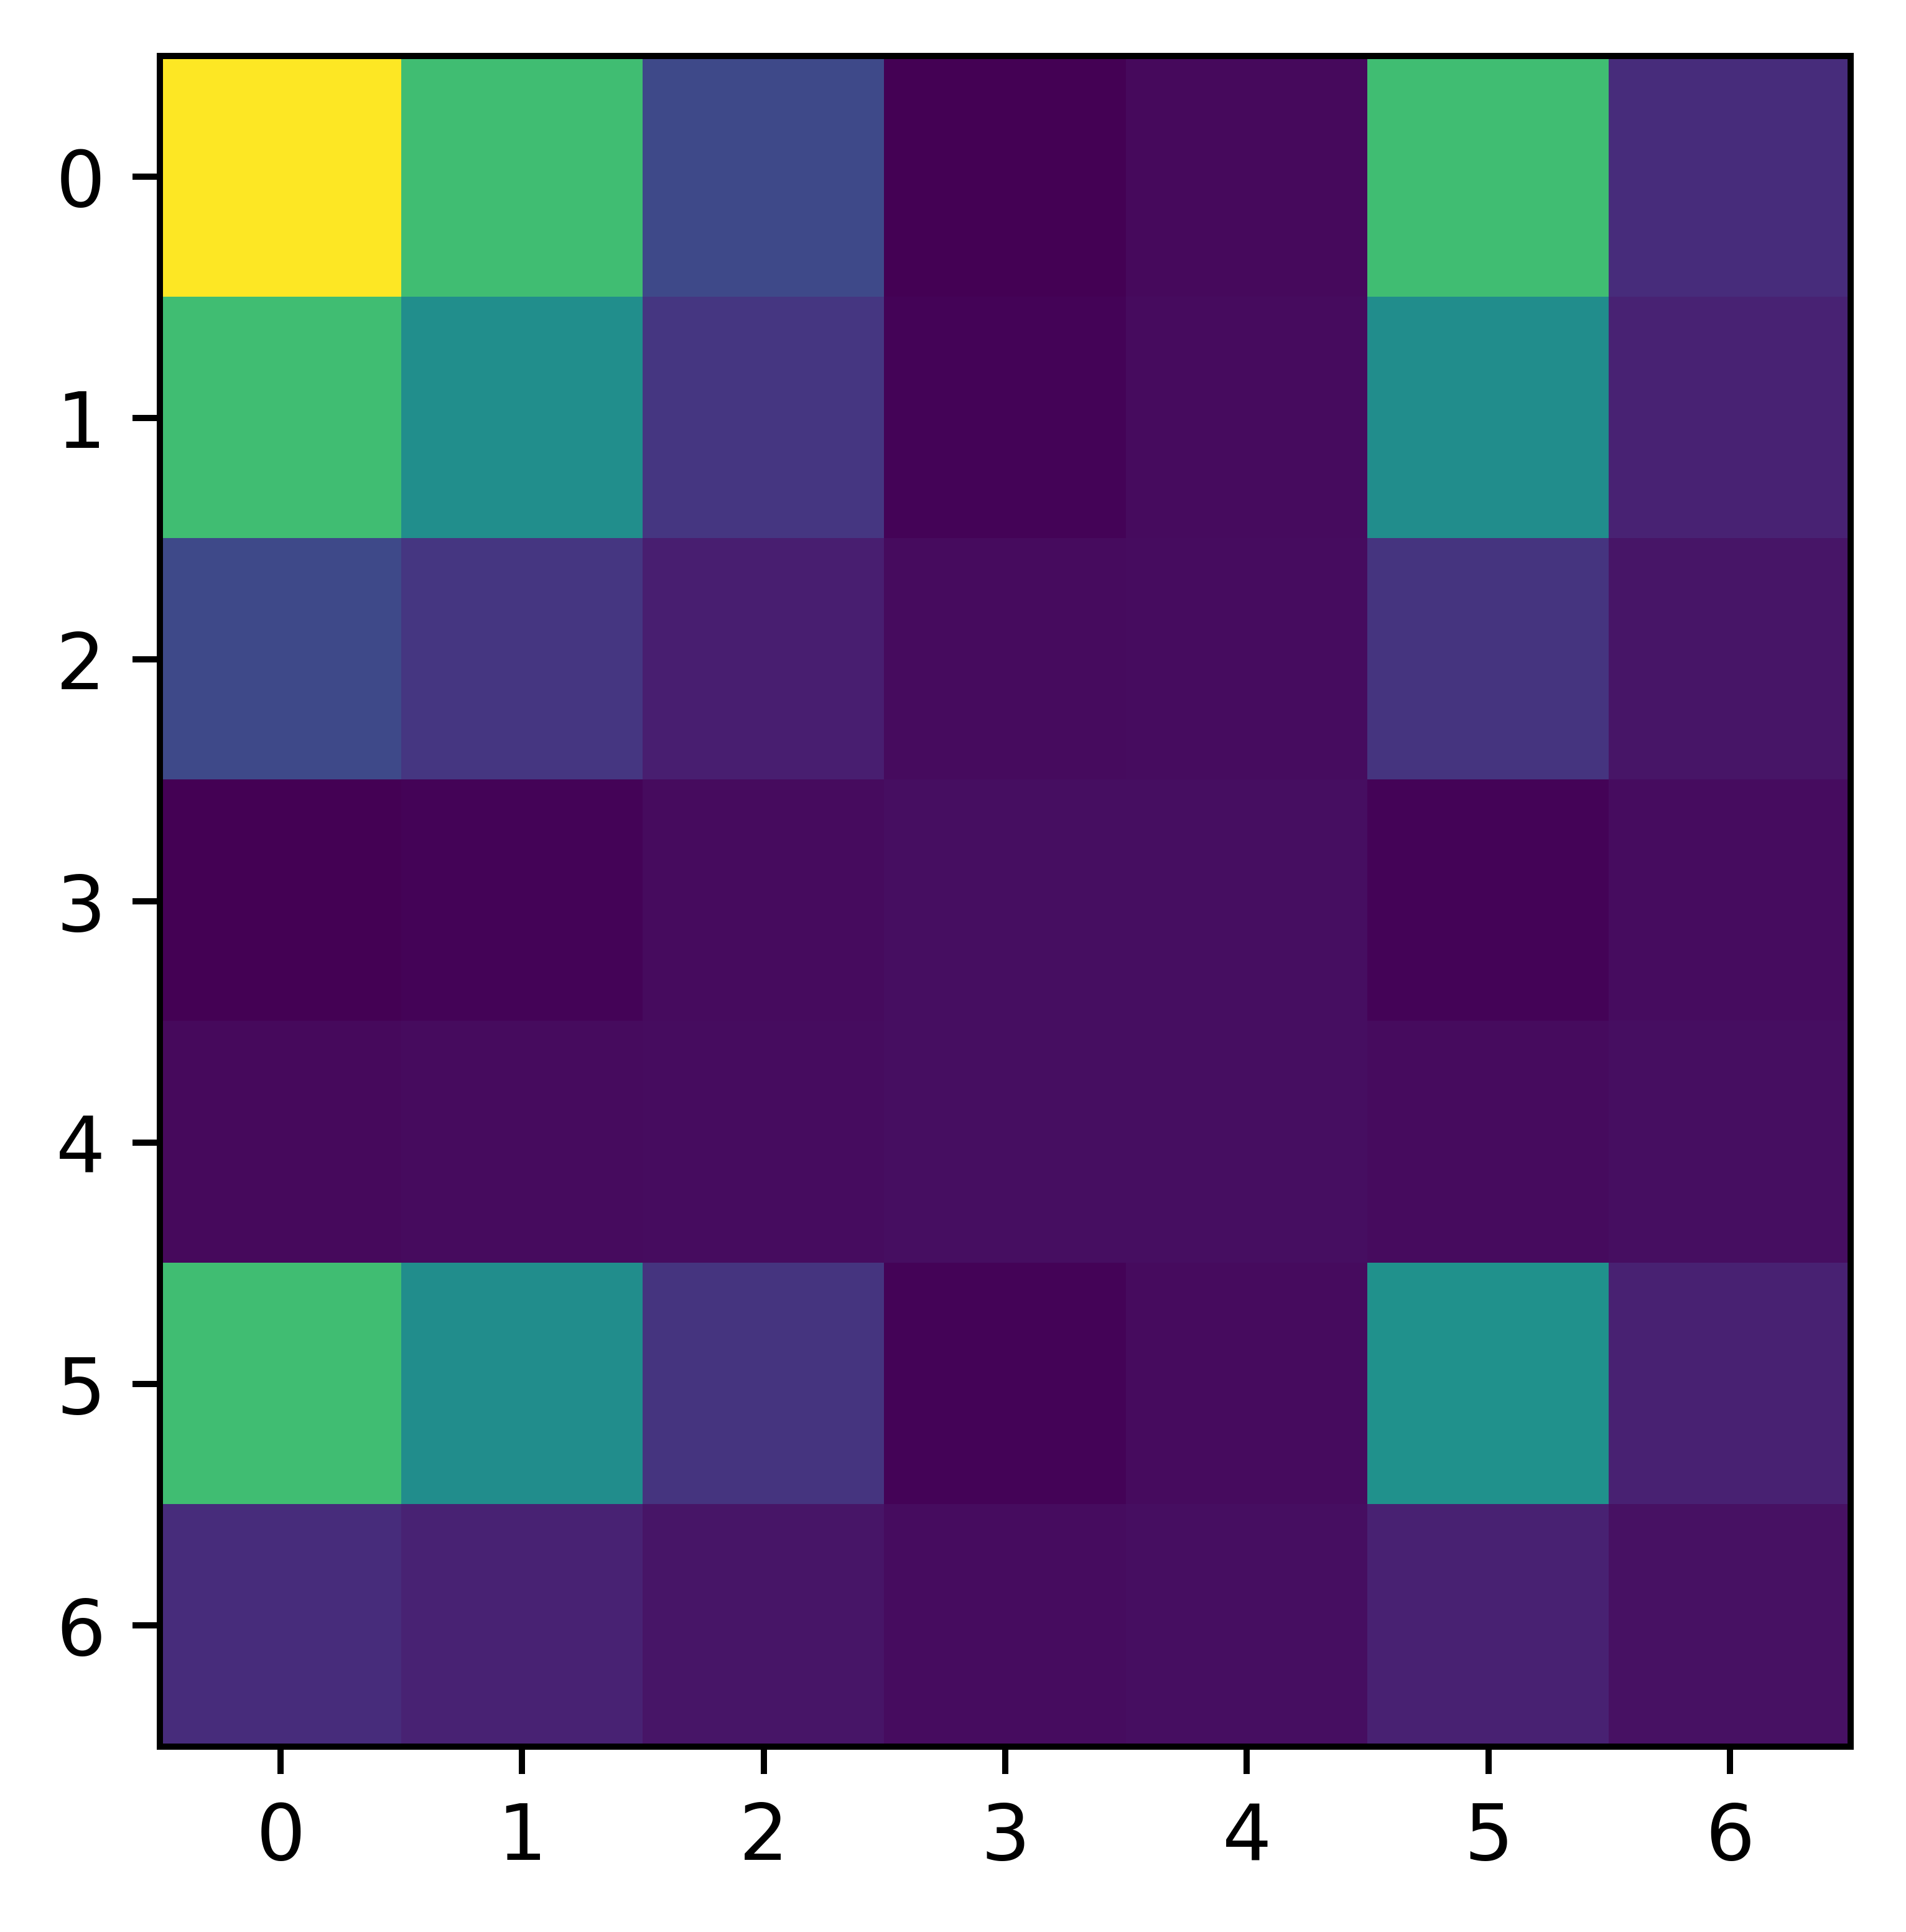

In [20]:
plt.imshow(fisher)

In [21]:
#generalize this